In [10]:
import requests
from bs4 import BeautifulSoup
import random
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import datetime
import time

In [86]:
class Department:
    def __init__(self, name, city):
        self.name = name
        self.city = city
        self.places = []
    
    def google_soup(self):
        url = 'https://www.google.com/search?q={}'.format('+'.join([self.name, 'ב'+self.city]).replace(' ','+'))
        print(url)
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36'}
        response = requests.get(url, headers=headers)
        content = response.content
        soup = BeautifulSoup((content).decode('UTF-8'))
        
        return soup
    
    def places_list(self):
        soup = self.google_soup()  
        link = soup.find('a', class_='cMjHbjVt9AZ__button')['href']
        print(link)
        url = 'https://www.google.com{}'.format(link)  
        print(url)
#         headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36'}
#         response = requests.get(url, headers=headers)
#         content = response.content
#         soup = BeautifulSoup((content).decode('UTF-8'))
        
#         self.list = listi
#         return listi
    
    
        
#     def set_places(self, limit=5):
        
        
    

In [93]:
x = Department('רכבות', 'ירושלים')

In [94]:
x.places_list()

https://www.google.com/search?q=רכבות+בירושלים
/search?q=%D7%A8%D7%9B%D7%91%D7%95%D7%AA+%D7%91%D7%99%D7%A8%D7%95%D7%A9%D7%9C%D7%99%D7%9D&npsic=0&rflfq=1&rldoc=1&rlha=0&rllag=31766497,35190467,2663&tbm=lcl&sa=X&ved=2ahUKEwitwt7w8_blAhWLMY8KHfZ2A6wQjGp6BAgKEDg
https://www.google.com/search?q=%D7%A8%D7%9B%D7%91%D7%95%D7%AA+%D7%91%D7%99%D7%A8%D7%95%D7%A9%D7%9C%D7%99%D7%9D&npsic=0&rflfq=1&rldoc=1&rlha=0&rllag=31766497,35190467,2663&tbm=lcl&sa=X&ved=2ahUKEwitwt7w8_blAhWLMY8KHfZ2A6wQjGp6BAgKEDg


In [226]:
def type_prop(p):
    try:
        place_type = p.find('span', class_='YhemCb').text
    except:
        try:
            place_type = p.find('div', class_='kpS1Ac').text
        except:
            print('ERROR: Couldn\'t find place type.')
            place_type = None 
    return place_type
    
def other_props(p):
    place_address = None
    other_attrib = {}
    
    try:
        for attrib in p.findAll('span', class_='LrzXr'):
            t = attrib.parent.find('span', class_='w8qArf').text.replace(': ','')

            if t == 'כתובת':
                place_address = attrib.text
            else:
                other_attrib[t] = attrib.text
    except:
        None

    return other_attrib, place_address

def events_prop(p):
    close_events = []
    classi = 'AxJnmb'
    sub_classi = 'PZPZlf'
    
    if p.find('a', class_='P7Vl4c') is not None:
        url = 'https://www.google.com{}'.format(p.find('a', class_='P7Vl4c')['href'])  
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36'}
        response = requests.get(url, headers=headers)
        content = response.content
        soup = BeautifulSoup((content).decode('UTF-8'))
        
        classi = 'EDblX'
        sub_classi = 'h998We'
        p = soup.find('div', class_='appbar')
        
    try:
        for e in p.find('div', class_=classi).findAll('div', class_=sub_classi):
            try:
                day = e.find('div', class_='aXUuyd').text
            except: day = None
            try:
                hour = e.find('div', class_='HoEOQb').text
            except: hour = None
            try:
                title = e.find('div', class_='title').text
            except: title = None
            close_events.append({'Day': day, 'Hour': hour, 'Title': title})
            print('***', day, hour, title)
    except Exception as e:
        None

    return close_events

def get_code_by_selenium(place, chrome_driver_location):
    chrome_driver_location = chrome_driver_location
    first_url = 'http://www.google.com'
    options = webdriver.ChromeOptions()
    options.add_experimental_option('prefs', {'intl.accept_languages': 'he'})
    driver = webdriver.Chrome(chrome_driver_location, chrome_options=options)
    
    #driver.minimize_window()
    driver.get(first_url)
    driver.find_element_by_name('q').clear()
    search = driver.find_element_by_name('q')
    search.send_keys(place)
    search.send_keys(Keys.RETURN)
    html_code = BeautifulSoup(driver.page_source, 'lxml')
    
    driver.close()
    return html_code
    

class Place:    
    def __init__(self, name):
        self.name = name
        
    def google_soup(self):
        url = 'https://www.google.com/search?q={}'.format(self.name.replace(' ','+'))  
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'}
        #headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36'}
        response = requests.get(url, headers=headers)
        content = response.content
        self.content = content
        soup = BeautifulSoup((content).decode('UTF-8'))
        self.soup = soup
        return soup
    
    def knowledge_panel(self):
        if hasattr(self, 'soup') == False:
            self.google_soup()       
        panel = self.soup.find('div', class_='knowledge-panel')
        
        self.panel = panel
        return panel
    
    def live_pop(self):
        cur_time = datetime.datetime.now().strftime("%D, %H:%M")
        
        if hasattr(self, 'panel') == False:
            self.knowledge_panel() 
        p = self.panel
        
        try:
            live_report = p.findAll('span', class_='m63ztc')[1].parent.text
            live_height = p.find('div', class_='ZQ55mf')['style']
        except:
            print('Couldn\'t find live property')
            live_report = None
            live_height = None
        try:
            usual_height = p.find('div', class_='ZQ55mf').parent['style'].split(';')[-1]
        except:
            usual_height = None


        
        return {'time': cur_time, 'live_report': live_report, 'live_height': live_height, 'usual_height': usual_height}
    
    def set_general_hours(self):
        chrome_driver_location = r'..\chromedriver_win32\chromedriver'
        soup = get_code_by_selenium(self.name, chrome_driver_location)
        
        week_dicti = {}
        for histo in soup.findAll('div', class_='ecodF'):
            day = histo['aria-label']
            day_dicti = {}
            for hour_ele in histo.findAll('div', class_='lubh-bar'):
                hour = hour_ele['aria-label'].split()[0]
                day_dicti[hour] = {'general_population': hour_ele['aria-label'], 'height': hour_ele['style']}
            week_dicti[day] = day_dicti

        self.general_population = week_dicti
        return week_dicti
    
    def set_props(self):
        if hasattr(self, 'panel') == False:
            self.knowledge_panel() 
        p = self.panel
        
        place_type = type_prop(p)
        
        try:
            place_descrip = p.find('div', class_='hb8SAc').text
        except:
            place_descrip = None
        
        other_attrib, place_address = other_props(p)
        
        close_events = events_prop(p)
        
        live_population = self.live_pop()
                
        self.type = place_type
        self.description = place_descrip
        self.address = place_address
        self.other = other_attrib
        self.events = close_events
        self.live_population = live_population
        
        return {'type': place_type, 'descrip': place_descrip}, other_attrib, close_events


In [231]:
x = Place('רכבת השלום')

In [232]:
s = time.time()
print(x.live_pop())
print(time.time() - s)

{'time': '11/19/19, 21:03', 'live_report': 'שידור חי: לא עמוס', 'live_height': 'height:14.92224857211113px', 'usual_height': 'height:17px'}
1.3497486114501953


In [220]:
for i in range(10):
    print(i)
    x = Place('דיזינגוף סנטר')
    print(x.live_pop())


0
שידור חי: לא עמוס מדי height:25.35092979669571px
Couldn't find live property
{'time': '11/19/19, 21:00', 'live_report': None, 'live_height': None, 'usual_height': None}
1
שידור חי: לא עמוס מדי height:25.342297554016113px
Couldn't find live property
{'time': '11/19/19, 21:00', 'live_report': None, 'live_height': None, 'usual_height': None}
2
שידור חי: לא עמוס מדי height:25.337985903024673px
Couldn't find live property
{'time': '11/19/19, 21:00', 'live_report': None, 'live_height': None, 'usual_height': None}
3
שידור חי: לא עמוס מדי height:25.333669781684875px
Couldn't find live property
{'time': '11/19/19, 21:00', 'live_report': None, 'live_height': None, 'usual_height': None}
4
שידור חי: לא עמוס מדי height:25.325042009353638px
Couldn't find live property
{'time': '11/19/19, 21:00', 'live_report': None, 'live_height': None, 'usual_height': None}
5
שידור חי: לא עמוס מדי height:25.32072812318802px
Couldn't find live property
{'time': '11/19/19, 21:01', 'live_report': None, 'live_height'

<div class="kp-blk knowledge-panel Wnoohf OJXvsb" data-hveid="CBAQAQ" data-ved="2ahUKEwjngNH7-PblAhUMtY8KHfK1DU8Qww0oAHoECBAQAQ"><div class="r-idCBGshZ4B3w xpdbox xpdclose xpdns" id="tsuid26" jsl="$t t-ORWJ5-27JLU;$x 0;"><div class="ifM9O"><div data-ved="2ahUKEwjngNH7-PblAhUMtY8KHfK1DU8Q_xd6BAgQEAI"><div class="kp-header" data-ved="2ahUKEwjngNH7-PblAhUMtY8KHfK1DU8Q3z56BAgSEAA" lang="iw-IL"><div lang="iw-IL"><h2 class="bNg8Rb">תוצאת מידע</h2></div><div><div><div class="NFQFxe oHglmf xzPb7d viOShc LKPcQc mod" data-md="32" lang="iw-IL" style="clear:none"><div class="ZH5mLb kno-mrg kno-swp" data-hveid="CBIQAg" id="media_result_group" style="position:relative"><div class="kno-fiu kno-liu"><div class="NFQFxe viOShc LKPcQc xsZWvb EfDVh mod" data-hveid="CBIQAw" data-md="6" data-ved="2ahUKEwjngNH7-PblAhUMtY8KHfK1DU8QkCkwDXoECBIQAw" lang="iw-IL"><!--m--><div style="font-size:small;overflow:hidden"><div class="luib" data-hveid="CBIQBA"><div class="BIZ8kb" data-hveid="CBIQBQ"><div class="luibli kn
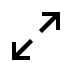

In [196]:
x.panel

In [173]:
s = x.soup

In [175]:
s = BeautifulSoup(x.content)

In [178]:
find = 'שידור חי'
r = 500

p = str(s).find(find)

print(str(s)[p-r:p+r])

bnhhf" style="height:14px;line-height:14px;width:14px"><svg focusable="false" viewbox="0 0 24 24" xmlns="http://www.w3.org/2000/svg"><path d="M16 11c1.66 0 2.99-1.34 2.99-3S17.66 5 16 5c-1.66 0-3 1.34-3 3s1.34 3 3 3zm-8 0c1.66 0 2.99-1.34 2.99-3S9.66 5 8 5C6.34 5 5 6.34 5 8s1.34 3 3 3zm0 2c-2.33 0-7 1.17-7 3.5V19h14v-2.5c0-2.33-4.67-3.5-7-3.5zm8 0c-.29 0-.62.02-.97.05 1.16.84 1.97 1.97 1.97 3.45V19h6v-2.5c0-2.33-4.67-3.5-7-3.5z"></path></svg></span><div><span class="m63ztc"><span class="f4LWDe">שידור חי</span>:</span> לא עמוס מדי</div></div></div><div class="eldaeC0zR5P__sp ayDZC"><div class="Z1uVqd"><div class="upZjbd"></div></div><div class="Z1uVqd"><div class="upZjbd"></div></div><div class="Z1uVqd"><div class="upZjbd"></div></div><div class="Z1uVqd"><div class="upZjbd"></div></div><div class="Z1uVqd"><div class="upZjbd"></div></div><div class="Z1uVqd"><div class="upZjbd"></div></div><div class="Z1uVqd"><div class="upZjbd"></div></div><div class="Z1uVqd"><div class="upZjbd"></div></

In [161]:
str(s)[342000:343600]

'mEvbt7uJ0",null,null,"pe"]\n,["t-L9CBsj706lI","iqqjF74FueqQ","r-iqqjF74FueqQ",[["local_quantum",null,null,null,null,[null,"[{\\"151364040\\":0}]\\n"]\n]\n,["attribute_type",null,null,null,null,[null,null,null,null,null,31]\n]\n,["ux",null,null,null,null,[null,"[{\\"220802553\\":1}]\\n"]\n]\n]\n,null,"pe"]\n,["t-i1YM35z_XsA","ixioeH9YWU0I","r-ixioeH9YWU0I",null,null,"eil"]\n,["t-izLg50Mkmp4","ibBIa_nCd8gw","r-ibBIa_nCd8gw"]\n,["t-pwbuG-LbAt4","icK_8y6w6Hj8","r-icK_8y6w6Hj8",[["data",null,null,null,null,[null,"[null,[[6,[0,0,0,15,28,44,54,56,48,39,34,34,35,32,25,15,0,0]\\n,null,[[6,0,null,null,\\"6:00\\"]\\n,[7,0,null,null,\\"7:00\\"]\\n,[8,0,null,null,\\"8:00\\"]\\n,[9,15,\\"בדרך כלל לא עמוס\\",null,\\"9:00\\"]\\n,[10,28,\\"בדרך כלל לא עמוס מדי\\",null,\\"10:00\\"]\\n,[11,44,\\"בדרך כלל לא עמוס מדי\\",null,\\"11:00\\"]\\n,[12,54,\\"בדרך כלל עמוס קצת\\",null,\\"12:00\\"]\\n,[13,56,\\"בדרך כלל עמוס קצת\\",null,\\"13:00\\"]\\n,[14,48,\\"בדרך כלל לא עמוס מדי\\",null,\\"14:00\\"]\\n,[15,39,

In [153]:
'בדרך כלל' in str(s)

True

In [150]:
s.find('div', class_='ZQ55mf').parent.parent

<div class="icK_8y6w6Hj8-pgwF18xgFOM yPHXsc"><div></div><div></div><div></div><div class="lubh-bar" style="height:9px"></div><div class="lubh-bar" style="height:18px"></div><div class="lubh-bar" style="height:29px"></div><div class="lubh-bar" style="height:36px"></div><div class="lubh-bar" style="height:39px"></div><div class="lubh-bar" style="height:38px"></div><div class="lubh-bar" style="height:36px"></div><div class="lubh-bar" style="height:36px"></div><div class="lubh-bar" style="height:36px"></div><div class="lubh-bar" style="height:35px"></div><div class="lubh-bar" style="height:33px"></div><div class="lubh-bar lubh-sel" style="background-color:#eceff1;height:26px"><div class="ZQ55mf" data-ved="2ahUKEwjq74-g9vblAhVPh1wKHRqABW4QlZ8BKAYwHXoECA0QBw" style="height:24.834168702363968px"><div class="wMdtM"></div></div></div><div class="lubh-bar" style="height:18px"></div><div></div><div></div></div>

In [27]:
len(soup.findAll('div', class_='ecodF'))

1

In [38]:
url = 'https://www.google.com/search?q={}'.format('דיזינגוף סנטר')  
headers = {'USER-AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36'}
headers['Accept'] = 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3'
headers['SEC-FETCH-MODE'] = 'navigate'
headers['SEC-FETCH-SITE'] = 'cross-site'
#headers['ACCEPT-ENCODING'] = 'gzip, deflate, br'

response = requests.get(url, headers=headers)
# print(response.headers)
content = response.content
soup = BeautifulSoup((content).decode('UTF-8'))
len(soup.findAll('div', class_='ecodF'))

1

In [44]:
import urllib2,cookielib

url = 'https://www.google.com/search?q={}'.format('dizingofcenter')  
hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}

req = urllib2.Request(url, headers=hdr)


page = urllib2.urlopen(req)


content = page.read()
print(content)

ModuleNotFoundError: No module named 'urllib2'

In [55]:
scrapy.Request(url=url)

b''

In [37]:
content.decode('UTF-32')

UnicodeDecodeError: 'utf-32-le' codec can't decode bytes in position 0-3: code point not in range(0x110000)

In [197]:
dict(response.request.headers)

{'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36',
 'Accept-Encoding': 'gzip, deflate',
 'Accept': '*/*',
 'Connection': 'keep-alive'}

In [195]:
requests.headers

AttributeError: module 'requests' has no attribute 'headers'